In [1]:
from dl1_data_handler.reader import DLWaveformReader, DLDataReader, TableQualityQuery, DLRawTriggerReader
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.io import EventSource
from ctapipe.visualization import CameraDisplay
from ctapipe.core.traits import List
from ctapipe.core import QualityQuery
import time
from pathlib import Path

In [3]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum", 
                              output_settings = "hot_patch",
                              hot_pixel_from_simulation = True,
                              trigger_settings = {"number_of_trigger_patches" : 7,"nsb_threshold" : 0, "interleave_patches" : False},
                              sequence_length = 10,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1],
                              quality_cuts = False)

In [6]:
%%timeit

reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum", 
                              output_settings = "hot_patch",
                              hot_pixel_from_simulation = True,
                              trigger_settings = {"number_of_trigger_patches" : 7,"nsb_threshold" : 0, "interleave_patches" : False},
                              sequence_length = 10,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1],
                              quality_cuts = False)

1.12 s ± 2.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit reader.generate_mono_batch(batch_indices = list(np.arange(49*3)))

ValueError: operands could not be broadcast together with shapes (49,2) (3,) 

In [5]:
reader.generate_mono_batch(batch_indices = list(np.arange(49)))

index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,true_energy,true_alt,true_az,true_shower_primary_id,spherical_offset_az,spherical_offset_alt,angular_separation,log_true_energy,true_shower_primary_class,patch_index,cherenkov_pe,waveform
,,,,,,,TeV,deg,deg,,deg,deg,deg,TeV,,,,
int64,int64,int64,int32,int64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64,"float32[28,28,10]"
0,0,0,1,0,502,1,0.010171852074563503,70.8581309781398,181.60217614294456,0,0.525364040491684,0.8650344210526874,1.0120627219315363,-1.9925999642324606,1,38,51,295.0 .. 298.0
1,0,0,1,0,502,1,0.010171852074563503,70.8581309781398,181.60217614294456,0,0.525364040491684,0.8650344210526874,1.0120627219315363,-1.9925999642324606,1,25,16,307.0 .. 307.0
2,0,0,1,0,502,1,0.010171852074563503,70.8581309781398,181.60217614294456,0,0.525364040491684,0.8650344210526874,1.0120627219315363,-1.9925999642324606,1,39,49,303.0 .. 0.0
3,0,0,1,0,502,1,0.010171852074563503,70.8581309781398,181.60217614294456,0,0.525364040491684,0.8650344210526874,1.0120627219315363,-1.9925999642324606,1,30,2,298.0 .. 293.0
4,0,0,1,0,502,1,0.010171852074563503,70.8581309781398,181.60217614294456,0,0.525364040491684,0.8650344210526874,1.0120627219315363,-1.9925999642324606,1,24,18,295.0 .. 297.0
5,0,0,1,0,502,1,0.010171852074563503,70.8581309781398,181.60217614294456,0,0.525364040491684,0.8650344210526874,1.0120627219315363,-1.9925999642324606,1,32,70,301.0 .. 302.0
6,0,0,1,0,502,1,0.010171852074563503,70.8581309781398,181.60217614294456,0,0.525364040491684,0.8650344210526874,1.0120627219315363,-1.9925999642324606,1,31,74,294.0 .. 298.0
7,0,0,1,0,502,1,0.010171852074563503,70.8581309781398,181.60217614294456,0,0.525364040491684,0.8650344210526874,1.0120627219315363,-1.9925999642324606,1,23,1,303.0 .. 302.0


In [4]:
reader.example_identifiers

index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,true_energy,true_alt,true_az,true_shower_primary_id,spherical_offset_az,spherical_offset_alt,angular_separation,log_true_energy,true_shower_primary_class
,,,,,,,TeV,deg,deg,,deg,deg,deg,TeV,
int64,int64,int64,int32,int64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,int64
0,0,0,1,0,502,1,0.010171852074563503,70.8581309781398,181.60217614294456,0,0.525364040491684,0.8650344210526874,1.0120627219315363,-1.9925999642324606,1
1,0,1,1,0,1903,1,0.0323750302195549,69.25027029657295,186.42116147033371,0,2.270902541209585,-0.6300573573282486,2.356642258017365,-1.4897898175306203,1
2,0,2,1,0,3101,1,0.3737192451953888,67.79137604080408,180.21307959030406,0,0.08059766747977562,-2.208482472234197,2.209951944437672,-0.42745453697254265,1
3,0,3,1,0,3305,1,0.015845729038119316,69.0996782857525,185.95937238054913,0,2.122823659504991,-0.7965095760810841,2.267270929175359,-1.800087774779224,1
4,0,4,1,0,3307,1,0.015845729038119316,69.0996782857525,185.95937238054913,0,2.122823659504991,-0.7965095760810841,2.267270929175359,-1.800087774779224,1
5,0,5,1,0,3700,1,0.1309148669242859,69.31930301851428,171.15997803415397,0,-3.11119630834888,-0.4548196477052714,3.1442328200154495,-0.8830110313976508,1
6,0,6,1,0,3701,1,0.1309148669242859,69.31930301851428,171.15997803415397,0,-3.11119630834888,-0.4548196477052714,3.1442328200154495,-0.8830110313976508,1
7,0,7,1,0,5900,1,0.03297586739063263,70.03329684340156,180.41779402010766,0,0.1426629899251493,0.033786271054327056,0.14660913493330305,-1.481803772036002,1


In [8]:
reader.trigger_settings

{'number_of_trigger_patches': 7,
 'nsb_threshold': 0,
 'interleave_patches': True,
 'trigger_patch_size': [np.int64(28), np.int64(28)],
 'trigger_patches': [{'x': np.int64(14), 'y': np.int64(14)},
  {'x': np.int64(14), 'y': np.int64(29)},
  {'x': np.int64(14), 'y': np.int64(43)},
  {'x': np.int64(14), 'y': np.int64(58)},
  {'x': np.int64(14), 'y': np.int64(73)},
  {'x': np.int64(14), 'y': np.int64(87)},
  {'x': np.int64(14), 'y': np.int64(102)},
  {'x': np.int64(29), 'y': np.int64(14)},
  {'x': np.int64(29), 'y': np.int64(29)},
  {'x': np.int64(29), 'y': np.int64(43)},
  {'x': np.int64(29), 'y': np.int64(58)},
  {'x': np.int64(29), 'y': np.int64(73)},
  {'x': np.int64(29), 'y': np.int64(87)},
  {'x': np.int64(29), 'y': np.int64(102)},
  {'x': np.int64(43), 'y': np.int64(14)},
  {'x': np.int64(43), 'y': np.int64(29)},
  {'x': np.int64(43), 'y': np.int64(43)},
  {'x': np.int64(43), 'y': np.int64(58)},
  {'x': np.int64(43), 'y': np.int64(73)},
  {'x': np.int64(43), 'y': np.int64(87)},
  {

In [12]:
import numpy as np

true_sums = np.array([10, 20, 30, 40, 50, 60, 70])
temp_index = np.array([4, 1, 5])  # Randomly selected patches

cherenkov = []
cherenkov.extend(true_sums[temp_index].tolist())

print(cherenkov)  # Output: [50, 20, 60]


[50, 20, 60]


In [5]:
%timeit reader.generate_mono_batch(batch_indices = list(np.arange(10000)))

28.8 s ± 687 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
reader.generate_mono_batch(batch_indices = list(np.arange(40)))

index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,features,cherenkov_pe,true_energy,true_alt,true_az,true_shower_primary_id,spherical_offset_az,spherical_offset_alt,angular_separation,log_true_energy,true_shower_primary_class,cosmic_nsb
,,,,,,,,,TeV,deg,deg,,deg,deg,deg,TeV,,
int64,int64,int64,int32,int64,int64,int64,"float32[28,28,10]",int64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64
0,0,0,1,0,502,1,295.0 .. 297.0,18,0.010171852074563503,70.8581309781398,181.60217614294456,0,0.525364040491684,0.8650344210526874,1.0120627219315363,-1.9925999642324606,1,0
1,0,0,1,0,502,1,0.0 .. 0.0,0,0.010171852074563503,70.8581309781398,181.60217614294456,0,0.525364040491684,0.8650344210526874,1.0120627219315363,-1.9925999642324606,1,1
2,0,1,1,0,1903,1,0.0 .. 288.0,2,0.0323750302195549,69.25027029657295,186.42116147033371,0,2.270902541209585,-0.6300573573282486,2.356642258017365,-1.4897898175306203,1,0
3,0,1,1,0,1903,1,0.0 .. 0.0,0,0.0323750302195549,69.25027029657295,186.42116147033371,0,2.270902541209585,-0.6300573573282486,2.356642258017365,-1.4897898175306203,1,1
4,0,2,1,0,3101,1,0.0 .. 0.0,2,0.3737192451953888,67.79137604080408,180.21307959030406,0,0.08059766747977562,-2.208482472234197,2.209951944437672,-0.42745453697254265,1,0
5,0,2,1,0,3101,1,302.0 .. 300.0,0,0.3737192451953888,67.79137604080408,180.21307959030406,0,0.08059766747977562,-2.208482472234197,2.209951944437672,-0.42745453697254265,1,1
6,0,3,1,0,3305,1,299.0 .. 318.0,21,0.015845729038119316,69.0996782857525,185.95937238054913,0,2.122823659504991,-0.7965095760810841,2.267270929175359,-1.800087774779224,1,0
7,0,3,1,0,3305,1,311.0 .. 314.0,0,0.015845729038119316,69.0996782857525,185.95937238054913,0,2.122823659504991,-0.7965095760810841,2.267270929175359,-1.800087774779224,1,1


In [4]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/NSB_protons/reduced/NSB/corsika_run4.dl1b.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum", 
                              output_settings = "all_patches",
                              hot_pixel_from_simulation = True,
                              trigger_settings = {"number_of_trigger_patches" : 7,"nsb_threshold" : 0, "interleave_patches" : True},
                              sequence_length = 10,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1],
                              quality_cuts = False)

In [10]:
reader.example_identifiers

index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,patch_index,true_energy,true_alt,true_az,true_shower_primary_id,spherical_offset_az,spherical_offset_alt,angular_separation,log_true_energy,true_shower_primary_class
,,,,,,,,TeV,deg,deg,,deg,deg,deg,TeV,
int64,int64,int64,int32,int64,int64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,int64
0,0,0,4,0,100,1,0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
1,0,0,4,0,100,1,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
2,0,0,4,0,100,1,2,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
3,0,0,4,0,100,1,3,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
4,0,0,4,0,100,1,4,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
5,0,0,4,0,100,1,5,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
6,0,0,4,0,100,1,6,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
7,0,0,4,0,100,1,7,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1


In [4]:
%%timeit
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/NSB_protons/reduced/NSB/corsika_run4.dl1b.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum", 
                              output_settings = "all_patches",
                              hot_pixel_from_simulation = True,
                              trigger_settings = {"number_of_trigger_patches" : 7,"nsb_threshold" : 0, "interleave_patches" : True},
                              sequence_length = 10,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1],
                              quality_cuts = False)

1.15 s ± 3.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


9.77 s ± 277 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.1 s ± 111 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
30.3 s ± 427 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
40 s ± 29.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
49.9 s ± 84.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 1s ± 506 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 10s ± 681 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 20s ± 521 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


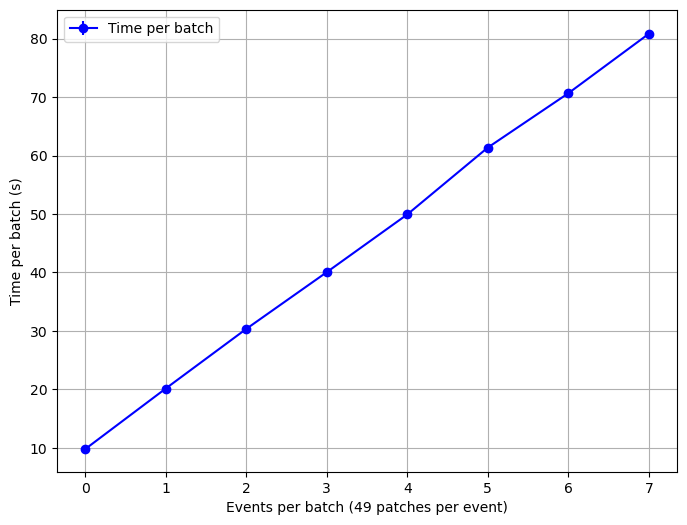

In [18]:
x = []
y = []
yerr = []  

for i in range(8):
    time = %timeit -o reader.generate_mono_batch(batch_indices=list(np.arange(49*(i+1))))
    mean_time = np.mean(time.all_runs)  
    stdev_time = np.std(time.all_runs)
    x.append(i)
    y.append(mean_time)  
    yerr.append(stdev_time) 

plt.figure(figsize=(8, 6))
plt.errorbar(x, y, yerr=yerr, fmt='-o', color='b', label='Time per batch')


plt.xlabel('Events per batch (49 patches per event)')
plt.ylabel('Time per batch (s)')

plt.grid(True)
plt.legend()
plt.show()